In [4]:
# %matplotlib inline
%matplotlib notebook

from __future__ import print_function ## Force python3-like printing
try:
    from importlib import reload
except:
    pass

from matplotlib import pyplot as plt

import os
import warnings

import numpy as np
from astropy.table import Table

import pycoco as pcc

reload(pcc) ## FOR DEV
reload(pcc.utils) ## FOR DEV


warnings.resetwarnings()

In [5]:
# sn = pcc.SNClass("SN2011dh")
sn = pcc.SNClass("mSN2011dh")

print(sn.name)
# sn.load_phot(verbose = True)

# sn.load_list("/Users/berto/Code/CoCo/lists/SN2009jf.list")
sn.load_list("/Users/berto/Code/CoCo/mSN2011dh.list")
# sn.load_list("/Users/berto/Code/CoCo/lists/SN2011dh.list")

sn.load_spec()
# sn.get_lcfit('/Users/berto/Code/CoCo/recon/SN2009jf.dat')

sn.plot_spec()

mSN2011dh


/Users/berto/Code/verbose-enigma/pycoco/utils/__init__.py:148: UserWarning: /Users/berto/Code/CoCo/mSN2011dh.list is not a valid file. Returning 'False'.
  warnings.warn(os.path.abspath(path) +


FileNotFoundError: [Errno 2] No such file or directory: '/Users/berto/Code/CoCo/mSN2011dh.list'

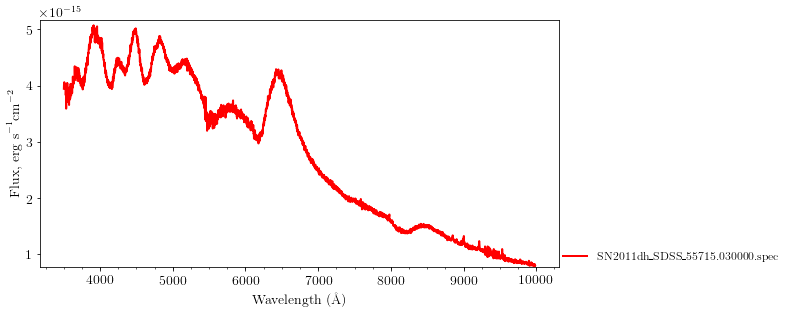

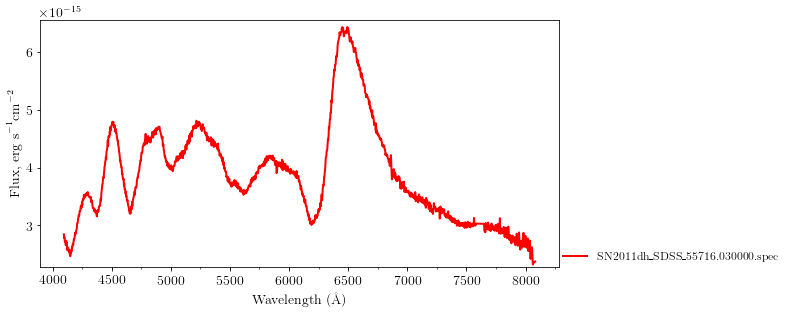

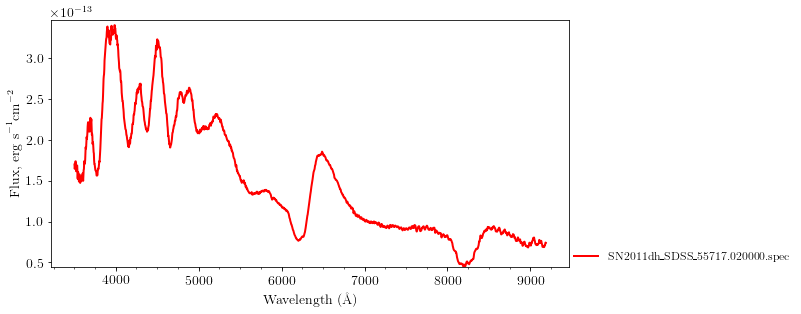

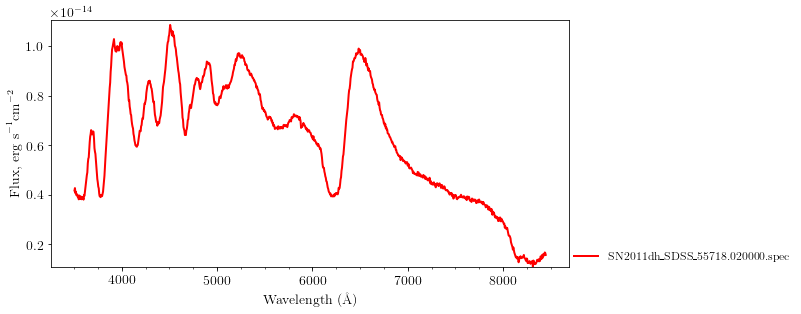

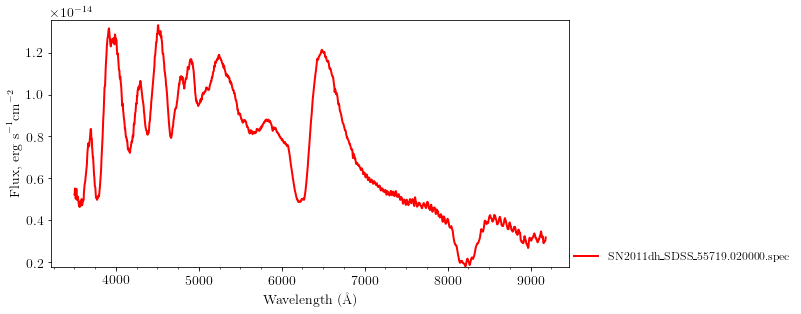

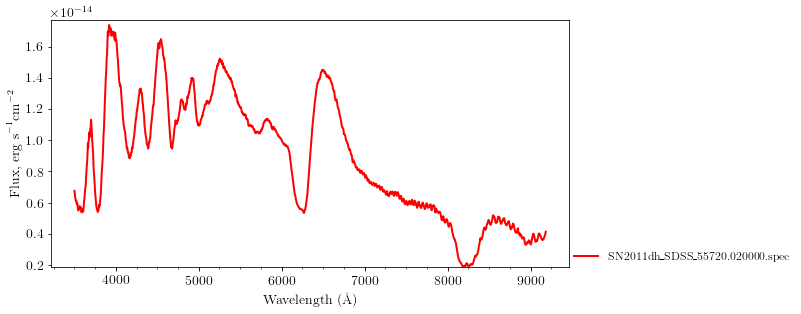

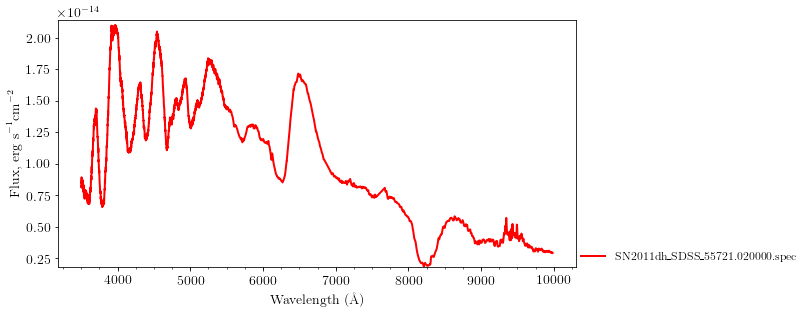

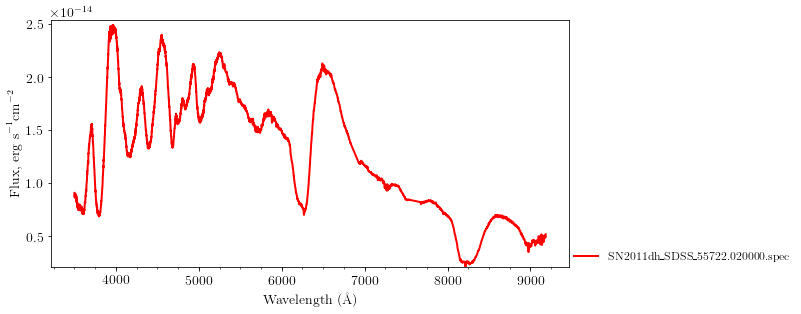

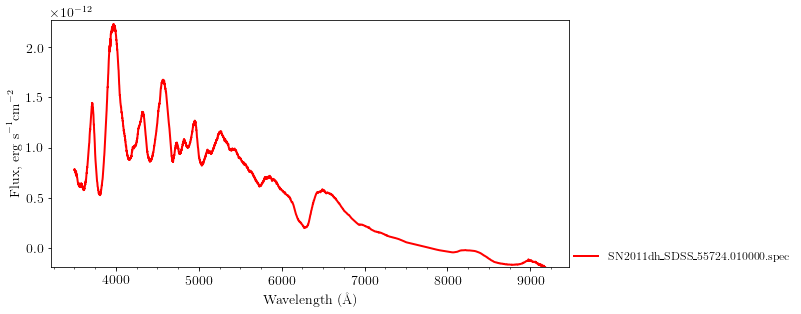

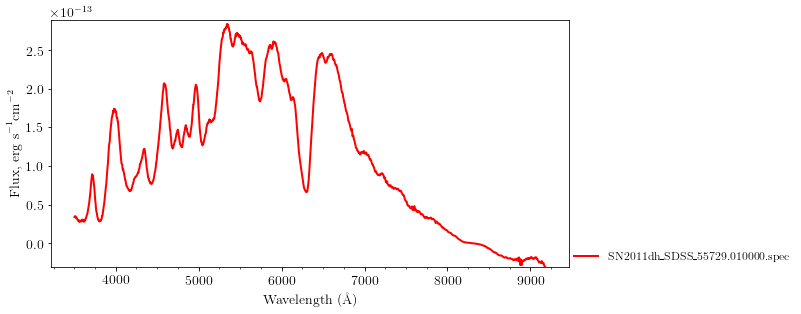

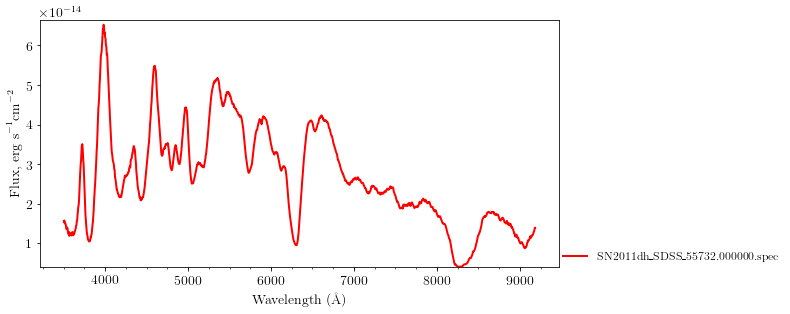

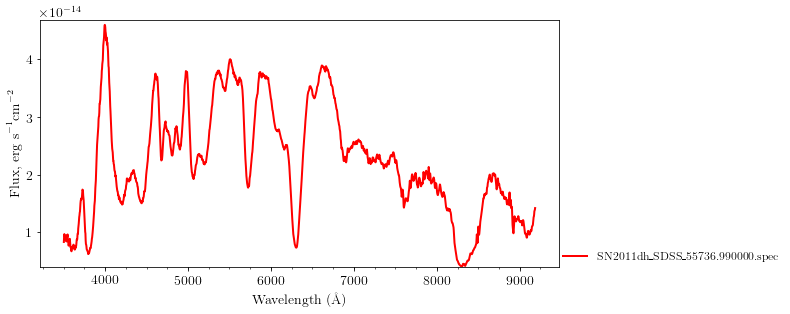

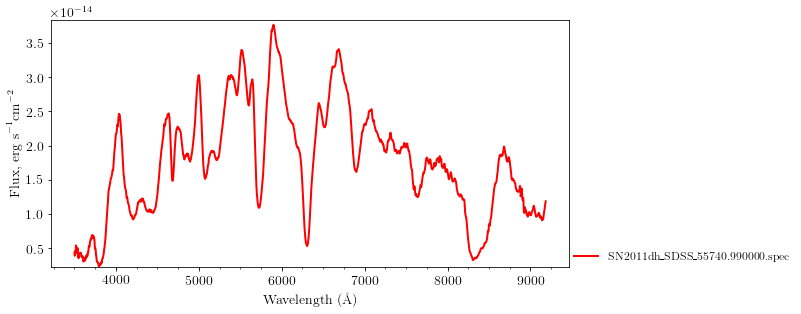

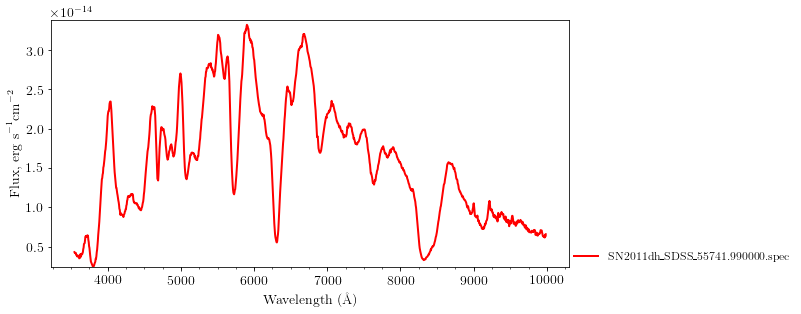

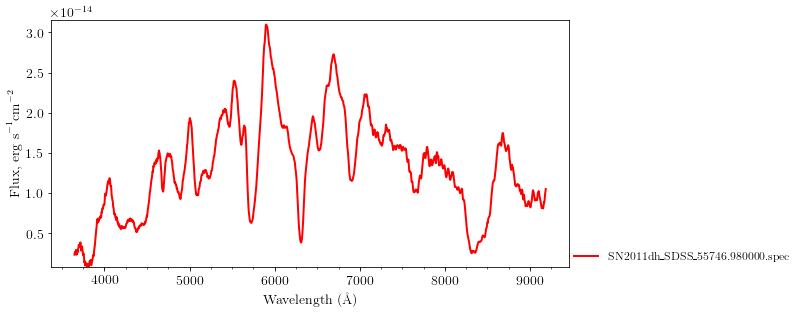

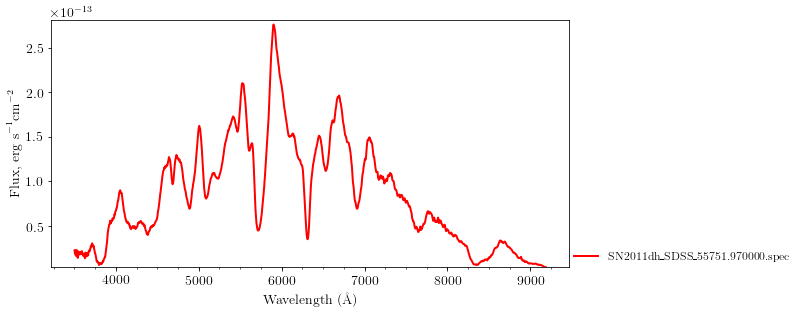

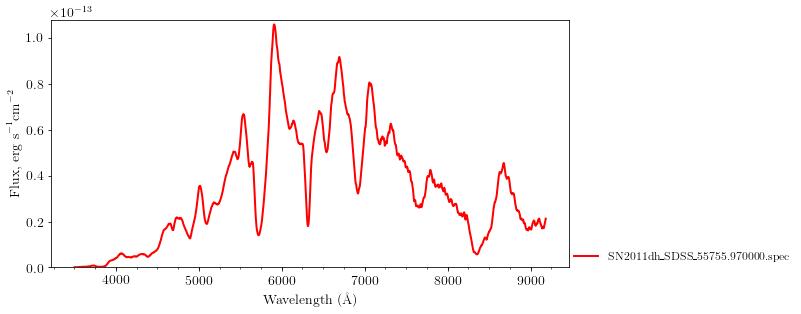

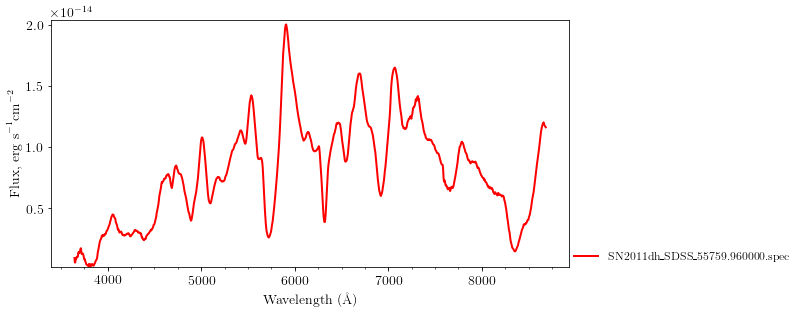

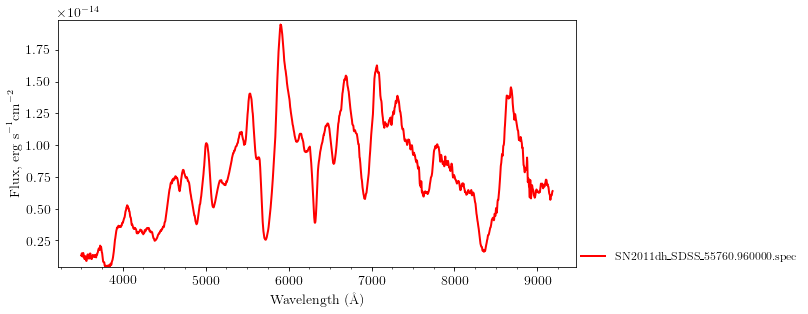

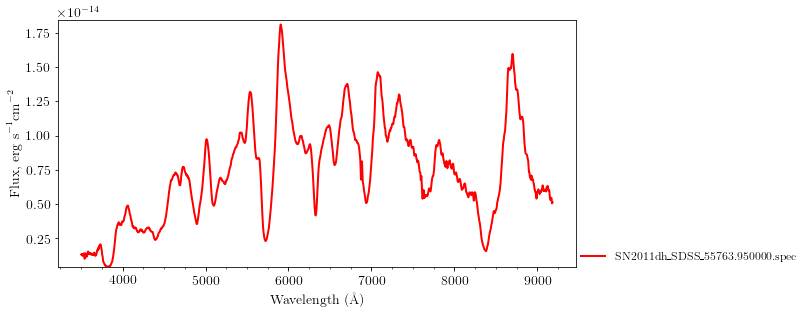

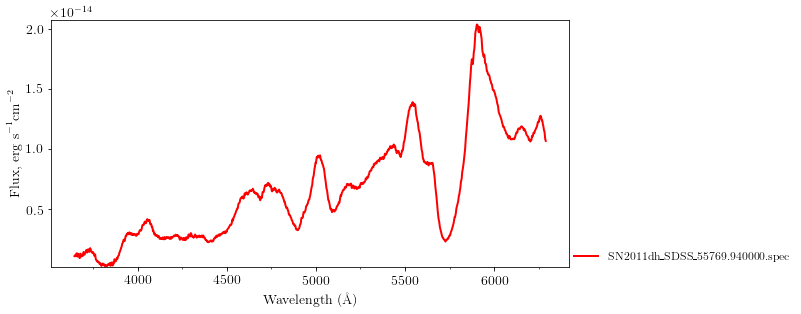

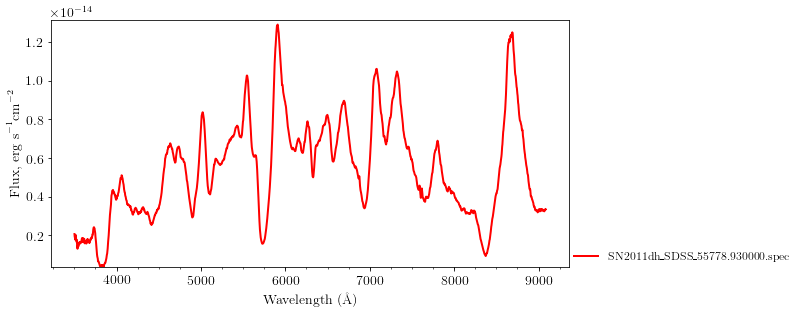

In [3]:
for spec in sn.spec.keys():
    sn.spec[spec].plot()

In [4]:
# sn.get_lcfit('/Users/berto/Code/CoCo/recon/SN2011dh.dat')
sn.get_lcfit('/Users/berto/Dropbox/cc_templates/SN2011dh.dat')

sn.load_phot(path = "/Users/berto/Code/CoCo/data/lc/SN2011dh.dat")

BessellB
SDSS_g
BessellV
SDSS_r
BessellR
SDSS_i
BessellI
SDSS_z
/Users/berto/Code/CoCo/data/lc/SN2011dh.dat


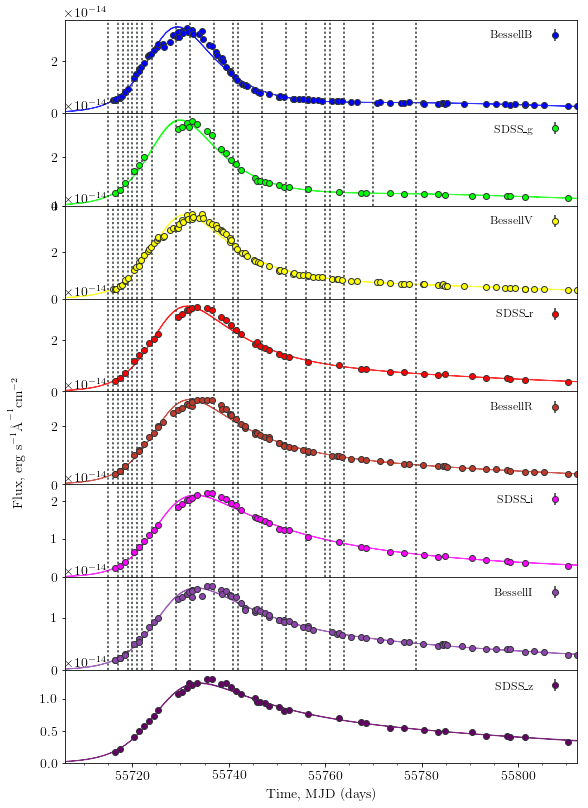

In [5]:
sn.plot_lc()

In [12]:
# sn.simplespecphot.data
sn.check_overlaps()
sn.get_simplespecphot(verbose = True)

0 SN2011dh_SDSS_55715.030000.spec BessellB
0 SN2011dh_SDSS_55715.030000.spec SDSS_g
0 SN2011dh_SDSS_55715.030000.spec BessellV
0 SN2011dh_SDSS_55715.030000.spec SDSS_r
0 SN2011dh_SDSS_55715.030000.spec BessellR
0 SN2011dh_SDSS_55715.030000.spec SDSS_i
0 SN2011dh_SDSS_55715.030000.spec BessellI
1 SN2011dh_SDSS_55716.030000.spec BessellV
1 SN2011dh_SDSS_55716.030000.spec SDSS_r
1 SN2011dh_SDSS_55716.030000.spec BessellR
2 SN2011dh_SDSS_55717.020000.spec BessellB
2 SN2011dh_SDSS_55717.020000.spec SDSS_g
2 SN2011dh_SDSS_55717.020000.spec BessellV
2 SN2011dh_SDSS_55717.020000.spec SDSS_r
2 SN2011dh_SDSS_55717.020000.spec BessellR
2 SN2011dh_SDSS_55717.020000.spec SDSS_i
2 SN2011dh_SDSS_55717.020000.spec BessellI
3 SN2011dh_SDSS_55718.020000.spec BessellB
3 SN2011dh_SDSS_55718.020000.spec SDSS_g
3 SN2011dh_SDSS_55718.020000.spec BessellV
3 SN2011dh_SDSS_55718.020000.spec SDSS_r
3 SN2011dh_SDSS_55718.020000.spec BessellR
3 SN2011dh_SDSS_55718.020000.spec SDSS_i
4 SN2011dh_SDSS_55719.020000.sp

In [11]:
print(hasattr(sn, 'lcfit'))
print(hasattr(sn, 'spec'))

True
True


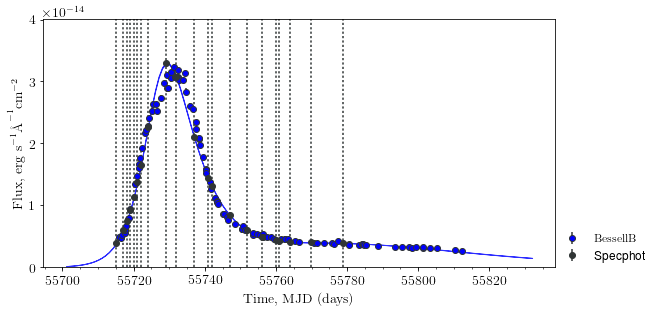

In [13]:
sn.plot_lc(["BessellB"], simplespecphot = True, multiplot = False)

In [63]:
mjd = np.unique(sn.simplespecphot.phot["MJD"])
bv_colours = np.array([])
bv_t = np.array([])
vr_colours = np.array([])
vr_t = np.array([])
ri_colours = np.array([])
ri_t = np.array([])

for t in mjd:
#     try:
    if t in sn.simplespecphot.data["BessellB"]["MJD"] and t in sn.simplespecphot.data["BessellV"]["MJD"]:
        wb = np.where(sn.simplespecphot.data["BessellB"]["MJD"] == t)
        wv = np.where(sn.simplespecphot.data["BessellV"]["MJD"] == t)
        bv_colours = np.append(bv_colours, sn.simplespecphot.data["BessellB"]["flux"][wb] - sn.simplespecphot.data["BessellV"]["flux"][wv])
        bv_t = np.append(bv_t, t)

        #         print(sn.simplespecphot.data["BessellB"]["flux"][wb], sn.simplespecphot.data["BessellV"]["flux"][wb])
    if t in sn.simplespecphot.data["BessellV"]["MJD"] and t in sn.simplespecphot.data["BessellR"]["MJD"]:
        wv = np.where(sn.simplespecphot.data["BessellV"]["MJD"] == t)
        wr = np.where(sn.simplespecphot.data["BessellR"]["MJD"] == t)
        vr_colours = np.append(vr_colours, sn.simplespecphot.data["BessellV"]["flux"][wv] - sn.simplespecphot.data["BessellR"]["flux"][wr])
        vr_t = np.append(vr_t, t)

    if t in sn.simplespecphot.data["BessellR"]["MJD"] and t in sn.simplespecphot.data["BessellI"]["MJD"]:
        wr = np.where(sn.simplespecphot.data["BessellR"]["MJD"] == t)
        wi = np.where(sn.simplespecphot.data["BessellI"]["MJD"] == t)
        ri_colours = np.append(ri_colours, sn.simplespecphot.data["BessellR"]["flux"][wr] - sn.simplespecphot.data["BessellI"]["flux"][wi])
        ri_t = np.append(ri_t, t)
#     if t in sn.simplespecphot.data["BessellV"]["MJD"] and t in sn.simplespecphot.data["BessellR"]["MJD"]:
#         vr_colours = np.append(vr_colours, sn.simplespecphot.data["BessellV"]["MJD"] - sn.simplespecphot.data["BessellR"]["MJD"])
#     if t in sn.simplespecphot.data["BessellR"]["MJD"] and t in sn.simplespecphot.data["BessellI"]["MJD"]:
#         ri_colours = np.append(ri_colours, sn.simplespecphot.data["BessellR"]["MJD"] - sn.simplespecphot.data["BessellI"]["MJD"])
   
#     except:
#         print(t, " didn't work")

In [64]:
print(bv_colours, vr_colours, ri_colours)

[  3.78036661e-16   5.99966610e-16   7.44064470e-16   9.08599872e-16
   1.08702864e-15   1.26501291e-15   1.41705507e-15   1.47392996e-15
  -1.85404314e-15  -5.22100000e-15  -8.14447984e-15  -8.33502674e-15
  -8.23123572e-15  -7.31745978e-15  -6.17856733e-15  -5.29735242e-15
  -4.51003146e-15  -4.32992505e-15  -3.83446729e-15  -2.22196095e-15] [  6.01843436e-16   7.76788605e-16   9.96657916e-16   1.27679934e-15
   1.62735669e-15   2.06055320e-15   2.58667213e-15   3.21023309e-15
   4.70135713e-15   7.65104153e-15   6.87277812e-15   3.32843096e-15
   9.86915909e-16   5.48471982e-16  -9.03892279e-16  -1.49081272e-15
  -1.59647351e-15  -1.52015589e-15  -1.48336475e-15  -1.34754175e-15
  -5.69215747e-16] [  1.34184824e-15   2.09735368e-15   3.23347418e-15   3.97757479e-15
   4.85067781e-15   5.85089931e-15   8.13889387e-15   1.30142266e-14
   1.32881765e-14   1.07087080e-14   8.30758187e-15   7.77872257e-15
   5.63992554e-15   4.20082172e-15   3.40489605e-15   2.71140375e-15
   2.40665468e

In [27]:
# bv_colours = sn.simplespecphot.data["BessellB"]["flux"] - sn.simplespecphot.data["BessellV"]["flux"]
# vr_colours = sn.simplespecphot.data["BessellV"]["flux"] - sn.simplespecphot.data["BessellR"]["flux"]
# ri_colours = sn.simplespecphot.data["BessellR"]["flux"] - sn.simplespecphot.data["BessellI"]["flux"]

# for mjd in sn.simpleps

ValueError: operands could not be broadcast together with shapes (21,) (18,) 

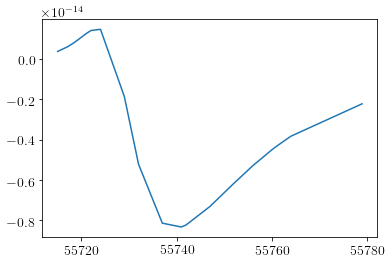

In [66]:
plt.plot(bv_t, bv_colours)

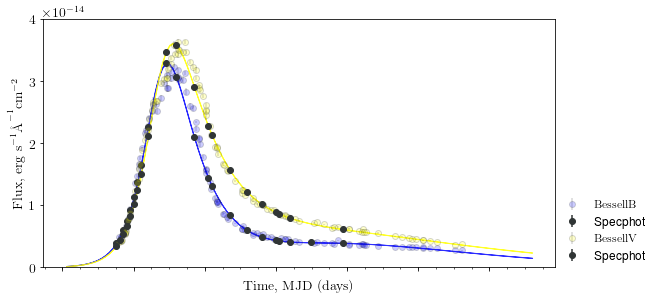

In [67]:
sn.plot_lc(["BessellB","BessellV"], mark_spectra=False, multiplot=False, simplespecphot=True, fade=True)

In [72]:
B = sn.lcfit.spline["BessellB"](sn.lcfit.data["BessellB"]["MJD"])
V = sn.lcfit.spline["BessellV"](sn.lcfit.data["BessellB"]["MJD"])
R = sn.lcfit.spline["BessellR"](sn.lcfit.data["BessellB"]["MJD"])
I = sn.lcfit.spline["BessellI"](sn.lcfit.data["BessellB"]["MJD"])

Bmag = -2.5*np.log(B)
Vmag = -2.5*np.log(V)
Rmag = -2.5*np.log(R)
Imag = -2.5*np.log(I)

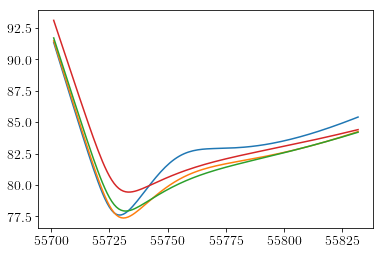

In [76]:
plt.plot(sn.lcfit.data["BessellB"]["MJD"], Bmag)
plt.plot(sn.lcfit.data["BessellB"]["MJD"], Vmag)
plt.plot(sn.lcfit.data["BessellB"]["MJD"], Rmag)
plt.plot(sn.lcfit.data["BessellB"]["MJD"], Imag)

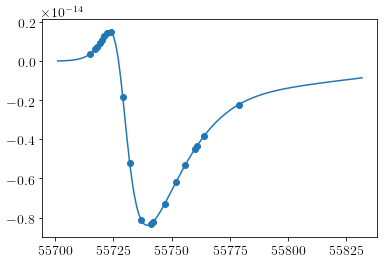

In [73]:
plt.plot(sn.lcfit.data["BessellB"]["MJD"], B-V)
plt.scatter(bv_t, bv_colours)